# Predicting the stock market

The data contains 16590 rows, each of which represents a daily record of the price of the S&P500 Index from 1950 to 2015.

Here are the descriptions for columns in the data given by Dataquest:

**Date** -- The date of the record.

**Open** -- The opening price of the day (when trading starts).

**High** -- The highest trade price during the day.

**Low** -- The lowest trade price during the day.

**Close** -- The closing price for the day (when trading is finished).

**Volume** -- The number of shares traded.

**Adj Close** -- The daily closing price, adjusted retroactively to include any corporate actions.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

sphist = pd.read_csv("/Users/apple/Downloads/python_dataquest/Guided Project_ Predicting the stock market/sphist.csv", parse_dates= ["Date"])

To start with, let's have a quick look at the first and last few rows as well as essential information of the data to imagine how the data looks like as well as get to know data types of columns and the number of non-null values.

In [2]:
sphist.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [3]:
sphist.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
16585,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08
16586,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98
16587,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93
16588,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85
16589,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66


In [4]:
sphist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16590 entries, 0 to 16589
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       16590 non-null  datetime64[ns]
 1   Open       16590 non-null  float64       
 2   High       16590 non-null  float64       
 3   Low        16590 non-null  float64       
 4   Close      16590 non-null  float64       
 5   Volume     16590 non-null  float64       
 6   Adj Close  16590 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 907.4 KB


Now, we will sort the dataframe on the "Date" column in ascending order.

In [5]:
sphist = sphist.sort_values("Date", ascending = True)

In [6]:
sphist.head()

,Date,Open,High,Low,Close,Volume,Adj Close
16589,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66
16588,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85
16587,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93
16586,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98
16585,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08


Next, as a part of building a prediction model, we are going to create new columns that contain the average price of the last trades for each row. Here are the descriptions for the new columns:

**day_5:** The average price from the past 5 days.

**day_30:** The average price for the past 30 days.

**day_365:** The average price for the past 365 days.

**ratio_5_and_365:** The ratio between the average price for the past 5 days, and the average price for the past 365 days.

**std_5:** The standard deviation of the price over the past 5 days.

**std_365:** The standard deviation of the price over the past 365 days.

**ratio_std_5_and_365:** The ratio between the standard deviation for the past 5 days, and the standard deviation for the past 365 days.


In [7]:
sphist1 = sphist.copy()

In [8]:
sphist1["day_5"] = sphist1["Close"].rolling(window = 5).mean()

In [9]:
sphist1["day_30"] = sphist1["Close"].rolling(window = 30).mean()

In [10]:
sphist1["day_365"] = sphist1["Close"].rolling(window = 365).mean()

In [11]:
sphist1["std_5"] = sphist1["Close"].rolling(window = 5).std()

In [12]:
sphist1["std_365"] = sphist1["Close"].rolling(window = 365).std()

In [13]:
sphist1["ratio_5_and_365"] = sphist1["day_5"]/sphist1["day_365"]

In [14]:
sphist1["ratio_std_5_and_365"] = sphist1["std_5"]/sphist1["std_365"]

In [15]:
sphist1[["day_5","day_30","day_365","std_5","std_365","ratio_5_and_365","ratio_std_5_and_365"]] = sphist1[["day_5","day_30","day_365","std_5","std_365","ratio_5_and_365","ratio_std_5_and_365"]].shift(1, axis = 0)

In [16]:
sphist1.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close,day_5,day_30,day_365,std_5,std_365,ratio_5_and_365,ratio_std_5_and_365
16589,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16588,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16587,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16586,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16585,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16584,1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001,16.900,NaN,NaN,0.157956,NaN,NaN,NaN
16583,1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000,16.974,NaN,NaN,0.089051,NaN,NaN,NaN
16582,1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000,17.022,NaN,NaN,0.067602,NaN,NaN,NaN
16581,1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000,16.988,NaN,NaN,0.134796,NaN,NaN,NaN
16580,1950-01-16,16.719999,16.719999,16.719999,16.719999,1460000.0,16.719999,16.926,NaN,NaN,0.196545,NaN,NaN,NaN


Since our new columns require historical data for computation, it is inevitable to get null values for indicators that have no relevant historical data. Therefore, we are going to remove such null values from the dataframe to improve the accuracy of our prediction model later.

In [17]:
sphist1 = sphist1.dropna(axis = 0)

In [18]:
sphist1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16225 entries, 16224 to 0
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 16225 non-null  datetime64[ns]
 1   Open                 16225 non-null  float64       
 2   High                 16225 non-null  float64       
 3   Low                  16225 non-null  float64       
 4   Close                16225 non-null  float64       
 5   Volume               16225 non-null  float64       
 6   Adj Close            16225 non-null  float64       
 7   day_5                16225 non-null  float64       
 8   day_30               16225 non-null  float64       
 9   day_365              16225 non-null  float64       
 10  std_5                16225 non-null  float64       
 11  std_365              16225 non-null  float64       
 12  ratio_5_and_365      16225 non-null  float64       
 13  ratio_std_5_and_365  16225 non-

In [19]:
sphist1.head()

,Date,Open,High,Low,Close,Volume,Adj Close,day_5,day_30,day_365,std_5,std_365,ratio_5_and_365,ratio_std_5_and_365
16224,1951-06-19,22.020000,22.020000,22.020000,22.020000,1100000.0,22.020000,21.800,21.703333,19.447726,0.256223,1.790253,1.120954,0.143121
16223,1951-06-20,21.910000,21.910000,21.910000,21.910000,1120000.0,21.910000,21.900,21.683000,19.462411,0.213659,1.789307,1.125246,0.119409
16222,1951-06-21,21.780001,21.780001,21.780001,21.780001,1100000.0,21.780001,21.972,21.659667,19.476274,0.092574,1.788613,1.128142,0.051758
16221,1951-06-22,21.549999,21.549999,21.549999,21.549999,1340000.0,21.549999,21.960,21.631000,19.489562,0.115108,1.787659,1.126757,0.064390
16220,1951-06-25,21.290001,21.290001,21.290001,21.290001,2440000.0,21.290001,21.862,21.599000,19.502082,0.204132,1.786038,1.121008,0.114293


Next, we will split the data into training and testing sets.

The training set named "train" will contain data before 01/01/2013.

The remaining number of rows in the data will belong to the testing test named "test".

In [20]:
train = sphist1[sphist1["Date"] < dt.datetime(year=2013, month=1, day=1)]

In [21]:
test = sphist1[sphist1["Date"] >= dt.datetime(year=2013, month=1, day=1)]

We will use the method of Linear Regression to train a machine learning algorithm on the training set and make predictions on the testing set.

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [23]:
sphist1_columns = sphist1.columns.tolist()

In [24]:
sphist1_columns

['Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Adj Close',
 'day_5',
 'day_30',
 'day_365',
 'std_5',
 'std_365',
 'ratio_5_and_365',
 'ratio_std_5_and_365']

After getting a list of column names, we are going to remove columns which might make the model make bad predictions.

Here are the columns will be removed:

**Close:** because this is our target column 

**High, Low, Open, Volume, Adj Close, Date:** These columns contain knowledge of the future that might make the prediction model biased.

In [25]:
features = ['day_5',
 'day_30',
 'day_365',
 'std_5',
 'std_365',
 'ratio_5_and_365',
 'ratio_std_5_and_365']

This is the list of features that we will use to predict our target variable which is the **Close** column

In [26]:
target = "Close"

In [27]:
lr.fit(train[features], train[target])
predictions = lr.predict(test[features])
mae = mean_absolute_error(test[target], predictions)

In [28]:
mae

16.14514060974413

After training the training test and making predictions on the testing test, we examine the Mean Absolute Error (mae), the magnitude of difference between the prediction of an observation and the true value of that observation.

This mae is quite low, meaning that our chosen prediction model worked well.


In [29]:
pd.Series(predictions)

0      1419.354407
1      1425.505780
2      1433.379736
3      1443.360695
4      1457.055697
          ...     
734    2088.183892
735    2091.064138
736    2088.769765
737    2079.334270
738    2079.565282
Length: 739, dtype: float64

In [30]:
predictions = pd.Series(predictions)

In [31]:
test_prediction = test.copy()

In [32]:
test_prediction = test_prediction.reset_index()

In [33]:
test_prediction["predictions"] = predictions
test_prediction

,index,Date,Open,High,Low,Close,Volume,Adj Close,day_5,day_30,day_365,std_5,std_365,ratio_5_and_365,ratio_std_5_and_365,predictions
0,738,2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,4.202600e+09,1462.420044,1418.641992,1414.258667,1327.534055,9.820801,90.463948,1.068629,0.108560,1419.354407
1,737,2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,3.829730e+09,1459.369995,1425.793994,1417.676668,1327.908247,22.261321,90.738976,1.073714,0.245334,1425.505780
2,736,2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,3.424290e+09,1466.469971,1433.702002,1420.092668,1328.224877,26.274326,90.995857,1.079412,0.288742,1433.379736
3,735,2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,3.304970e+09,1461.890015,1443.376001,1422.714665,1328.557617,27.945242,91.279049,1.086423,0.306152,1443.360695
4,734,2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,3.601600e+09,1457.150024,1455.267993,1425.076664,1328.898603,16.453319,91.544368,1.095093,0.179731,1457.055697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,2073.984998,2035.531178,3.916109,64.370261,1.025297,0.060837,2088.183892
735,3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,2076.283993,2035.914082,7.956808,64.352527,1.026680,0.123644,2091.064138
736,2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,2077.908659,2036.234356,9.333599,64.277554,1.025573,0.145208,2088.769765
737,1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,2078.931331,2036.507343,19.599946,64.121622,1.021580,0.305668,2079.334270


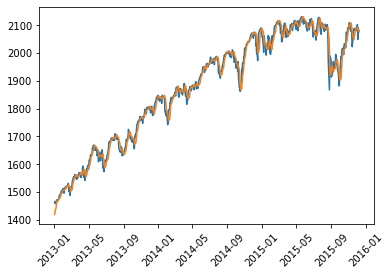

In [34]:
import matplotlib.pyplot as plt

plt.plot(test_prediction["Date"], test_prediction["Close"])
plt.plot(test_prediction["Date"],test_prediction["predictions"])
plt.xticks(rotation=45)
plt.show()


This is a graph illustrating the predicted and actual closing prices for periods of time from 2013 - 2015